# Laboratorio 2
Juan José Osorio - 202021720

Pablo Guatibonza - 202014393

Juan Sebastián Hoyos - 201822167


## 1. Entendimiento de los datos
### 1.1 Importación de librerías

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### 1.2 Carga de los datos

In [15]:
df_original = pd.read_csv(
    'data/MotorAlpes_data.csv',
    sep=',',
    encoding='utf-8',
    index_col=0)
df_motorAlpes = df_original.copy()


In [16]:
df_test = pd.read_csv(
    'data/MotorAlpes_test.csv',
    sep=',',
    encoding='utf-8',
    index_col=0
)

### 1.3 Entendimiento de los datos

In [17]:
df_motorAlpes.shape

(7115, 11)

In [18]:
df_motorAlpes.head()

,year,km_driven,owner,seller_type,seats,fuel,transmission,mileage,engine,max_power,selling_price
0,NaN,145500.0,NaN,Individual,5.0,Diesel,Manual,23.40,1248.0,74.00,5451.90
1,2014.0,120000.0,Second Owner,Individual,5.0,Diesel,Manual,21.14,1498.0,103.52,4482.68
2,2006.0,140000.0,Third Owner,Individual,5.0,Petrol,Manual,17.70,13524.0,78.00,1914.22
3,2010.0,127000.0,First Owner,Individual,5.0,Diesel,Manual,23.00,NaN,NaN,2725.95
4,2007.0,120000.0,First Owner,Individual,5.0,Petrol,Manual,16.10,1298.0,88.20,1574.99


In [19]:
df_motorAlpes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7115 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6876 non-null   float64
 1   km_driven      6917 non-null   float64
 2   owner          6876 non-null   object 
 3   seller_type    7115 non-null   object 
 4   seats          7115 non-null   float64
 5   fuel           7115 non-null   object 
 6   transmission   7115 non-null   object 
 7   mileage        6917 non-null   float64
 8   engine         6835 non-null   float64
 9   max_power      6847 non-null   float64
 10  selling_price  6714 non-null   float64
dtypes: float64(7), object(4)
memory usage: 667.0+ KB


In [20]:
df_motorAlpes.describe()

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,6876.000000,6.917000e+03,7115.000000,6917.000000,6835.000000,6847.000000,6714.000000
mean,2013.980948,6.911118e+04,5.411103,19.523473,1835.489539,141.981595,11261.208041
std,3.852565,5.796521e+04,0.953555,4.241574,2363.919253,274.956684,40765.694516
min,1994.000000,1.000000e+00,2.000000,0.000000,4.000000,1.070000,1.910000
25%,2012.000000,3.400000e+04,5.000000,16.800000,1197.000000,68.050000,3210.560000
50%,2015.000000,6.000000e+04,5.000000,19.330000,1248.000000,83.100000,5451.900000
75%,2017.000000,9.400000e+04,5.000000,22.320000,1597.000000,104.680000,8480.740000
max,2020.000000,2.360457e+06,14.000000,46.816000,19972.000000,1995.640000,598983.440000


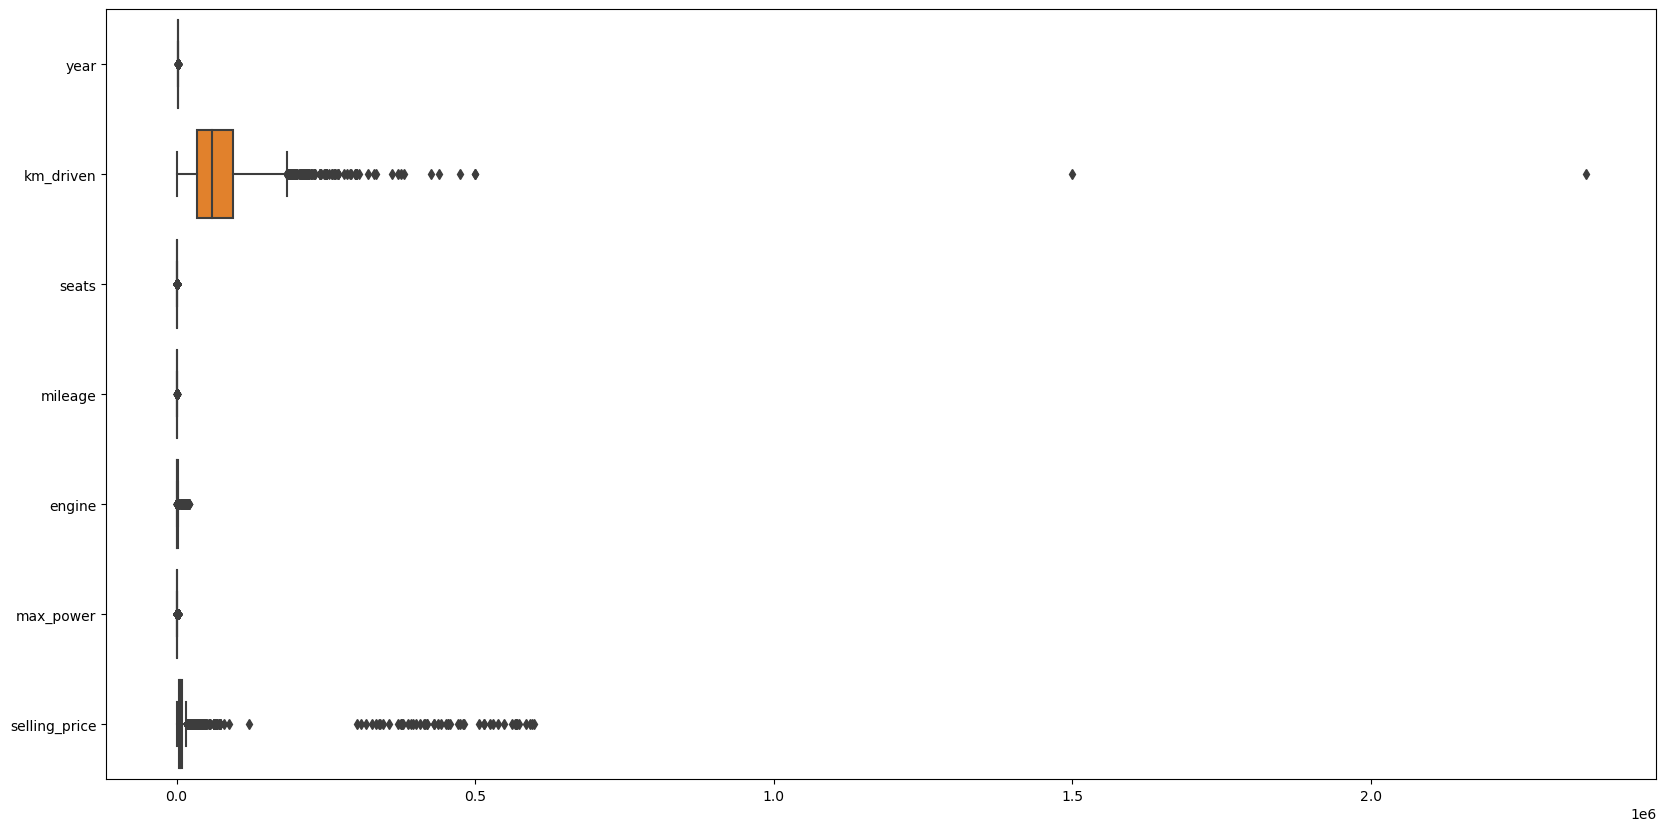

In [21]:
# Visualización de las variables numéricas
fig = plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=df_motorAlpes, orient='h')

In [22]:
# Información de las variables numéricas
variablesNumericas = [
    'year',
    'km_driven',
    'seats',
    'mileage',
    'engine',
    'max_power',
    'selling_price'
]

df_motorAlpes[variablesNumericas].describe()

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,6876.000000,6.917000e+03,7115.000000,6917.000000,6835.000000,6847.000000,6714.000000
mean,2013.980948,6.911118e+04,5.411103,19.523473,1835.489539,141.981595,11261.208041
std,3.852565,5.796521e+04,0.953555,4.241574,2363.919253,274.956684,40765.694516
min,1994.000000,1.000000e+00,2.000000,0.000000,4.000000,1.070000,1.910000
25%,2012.000000,3.400000e+04,5.000000,16.800000,1197.000000,68.050000,3210.560000
50%,2015.000000,6.000000e+04,5.000000,19.330000,1248.000000,83.100000,5451.900000
75%,2017.000000,9.400000e+04,5.000000,22.320000,1597.000000,104.680000,8480.740000
max,2020.000000,2.360457e+06,14.000000,46.816000,19972.000000,1995.640000,598983.440000


## 2. Identificación de las variables a utilizar


In [23]:
"""
La variable a utilizar es 'selling_price'
"""

df_motorAlpes['selling_price'].describe()

count      6714.000000
mean      11261.208041
std       40765.694516
min           1.910000
25%        3210.560000
50%        5451.900000
75%        8480.740000
max      598983.440000
Name: selling_price, dtype: float64

## 3. Preparación de los datos
### 3.1 Completitud

In [24]:
# Se calcula el porcentaje de los valores nulos por columna
(df_motorAlpes.isnull().sum()*100 / df_motorAlpes.shape[0]).sort_values(ascending=False)

selling_price    5.635980
engine           3.935348
max_power        3.766690
year             3.359100
owner            3.359100
km_driven        2.782853
mileage          2.782853
seller_type      0.000000
seats            0.000000
fuel             0.000000
transmission     0.000000
dtype: float64

Para las regresiones lineales, es necesario trabajar con variables numéricas. En este caso vamos unicamente a seleccionarlas, pero recuerde que existen técnicas para convertir variables categóricas a numéricas que también funcionan en este contexto

In [25]:
df_float = df_motorAlpes.select_dtypes(include=['float64']).copy()
df_float.describe()

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,6876.000000,6.917000e+03,7115.000000,6917.000000,6835.000000,6847.000000,6714.000000
mean,2013.980948,6.911118e+04,5.411103,19.523473,1835.489539,141.981595,11261.208041
std,3.852565,5.796521e+04,0.953555,4.241574,2363.919253,274.956684,40765.694516
min,1994.000000,1.000000e+00,2.000000,0.000000,4.000000,1.070000,1.910000
25%,2012.000000,3.400000e+04,5.000000,16.800000,1197.000000,68.050000,3210.560000
50%,2015.000000,6.000000e+04,5.000000,19.330000,1248.000000,83.100000,5451.900000
75%,2017.000000,9.400000e+04,5.000000,22.320000,1597.000000,104.680000,8480.740000
max,2020.000000,2.360457e+06,14.000000,46.816000,19972.000000,1995.640000,598983.440000


Limpieza del detaframe teniendo en cuenta la variable "selling_price"

In [27]:
"""
Se va a tomar la variable "selling_price" como la variable objetivo
"""

# Se eliminan las filas donde selling_price es nulo
df_motorAlpes.dropna(subset=['selling_price'], inplace=True) # Se modifica el dataframe 

# Se calcula el porcentaje de los valores nulos por columna, selling_price está en 0
(df_motorAlpes.isnull().sum()*100 / df_motorAlpes.shape[0]).sort_values(ascending=False)

engine           4.021448
max_power        3.842717
year             3.395889
owner            3.395889
km_driven        2.800119
mileage          2.800119
seller_type      0.000000
seats            0.000000
fuel             0.000000
transmission     0.000000
selling_price    0.000000
dtype: float64

### 3.2 Búsqueda de relaciones entre variables (diagramas de dispersión)

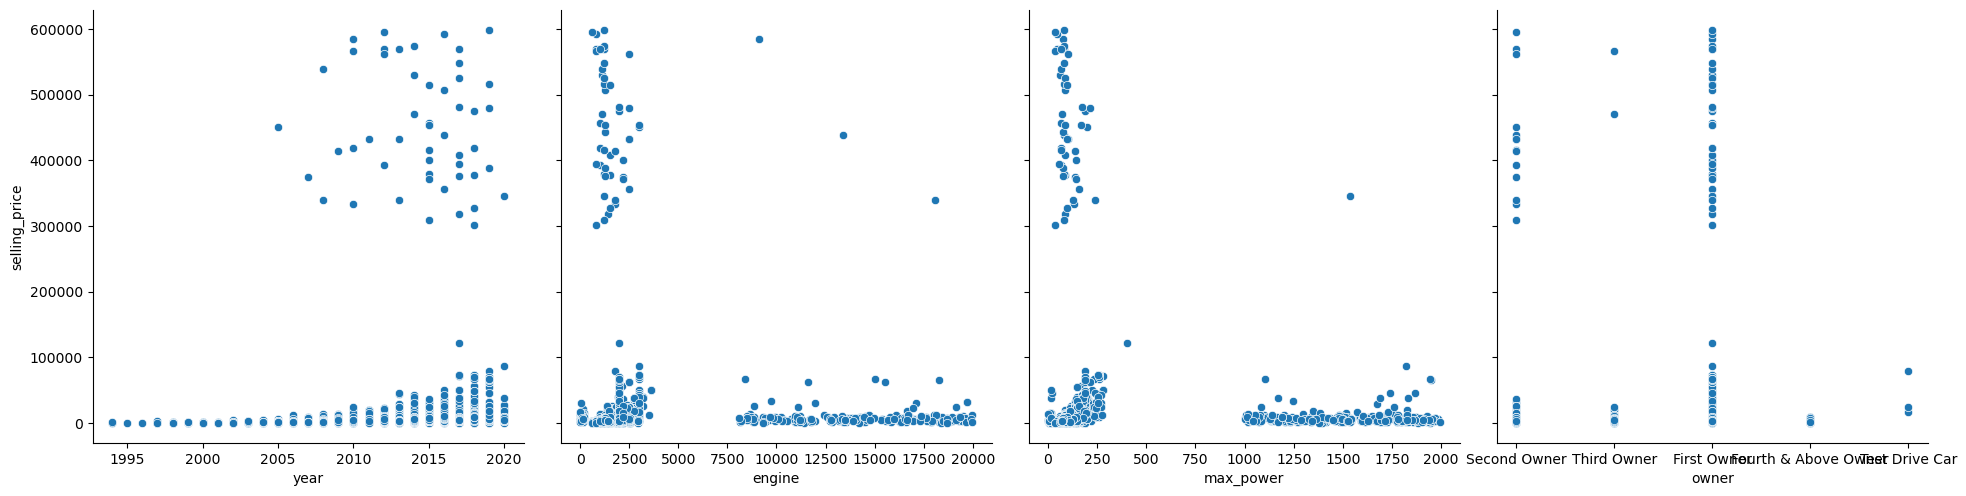

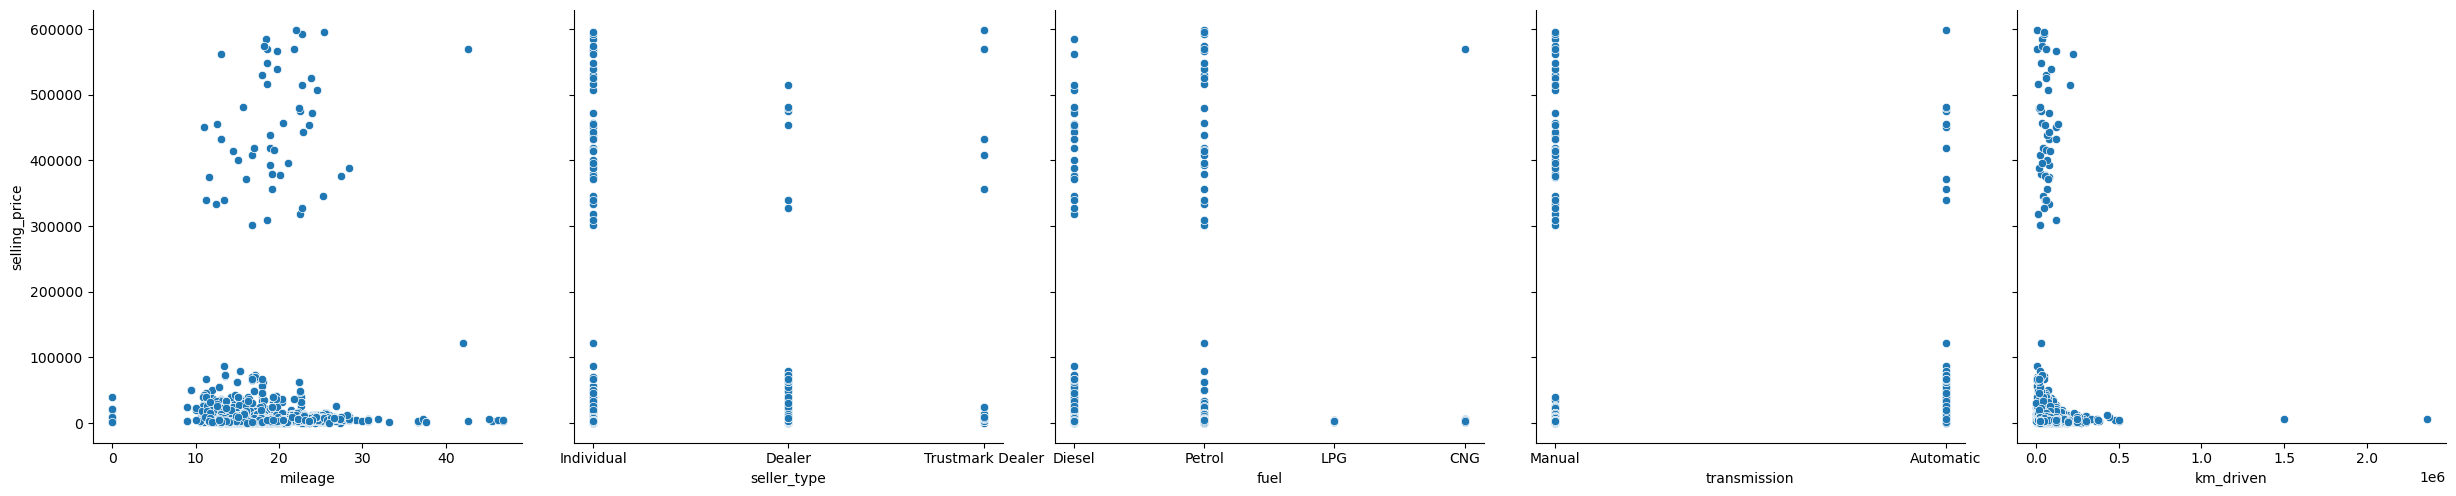

In [35]:
"""
Relación de selling_price con otras variables
"""
features = ['year', 'engine', 'max_power', 'owner', 'mileage', 'seller_type', 'fuel', 'transmission', 'km_driven']
sns.pairplot(df_motorAlpes, height=5, y_vars='selling_price', x_vars=features[:4], kind='scatter')
sns.pairplot(df_motorAlpes, height=5, y_vars='selling_price', x_vars=features[4:], kind='scatter')

De las gráficas anteriores vemos que unos buenos candidatos son:
- year
- km_driven
- engine

### 3.3 Búsqueda de relaciones entre variables (Matriz de correlaciones)
Buscamos cuáles de las columnas tiene una relación con danceability pero ahora utilizando correlaciones

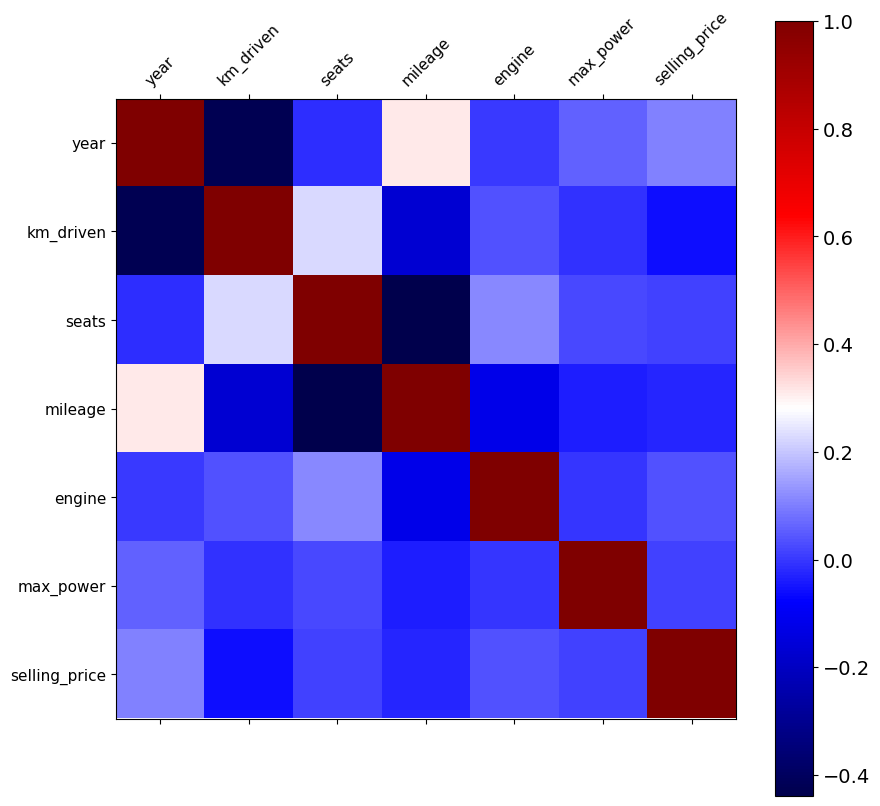

In [39]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df_float.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_float.select_dtypes(['float64']).shape[1]), df_float.select_dtypes(['float64']).columns, fontsize=11, rotation=45)
plt.yticks(range(df_float.select_dtypes(['float64']).shape[1]), df_float.select_dtypes(['float64']).columns, fontsize=11)

cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)


## 4. Modelamiento
### 4.1 Regresión Básica
Realizamos una regresión básica y luego la utilizamos para asignar la columna *selling_price* de los datos recientes.

Se quiere generar un unico modelo que podamos exportar y que pueda ser usado en producción para asignar nuevos valores

In [ ]:
# Preprocesamiento
selected_cols = ['year', 'km_driven', 'engine']

## 5. Evaluación cuantitativa

## 6. Evaluación cualitativa